# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.


## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2024-06-01 10:35:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-06-01 10:35:21 (5.14 MB/s) - 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv' saved [178509/178509]



In [2]:
!pip uninstall tensorflow -y 
!pip uninstall tensorflow-hub -y
!pip uninstall keras -y

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: tensorflow-hub 0.16.1
Uninstalling tensorflow-hub-0.16.1:
  Successfully uninstalled tensorflow-hub-0.16.1
Found existing installation: keras 3.2.1
Uninstalling keras-3.2.1:
  Successfully uninstalled keras-3.2.1


In [3]:
!pip install tensorflow==2.15

!pip install keras==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow-text 2.15.0 requires tensorflow-hub>=0.13.0, which is not installed.


In [4]:
!pip install tensorflow-hub==0.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 932.6 kB/s eta 0:00:00


## Importing time series with pandas

In [5]:
# Import with pandas
import pandas as pd 
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # prase the date column and tell pandas column 1 is a datetime 

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [8]:
# How many samples do we have?
len(df) 

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑 **Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [9]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


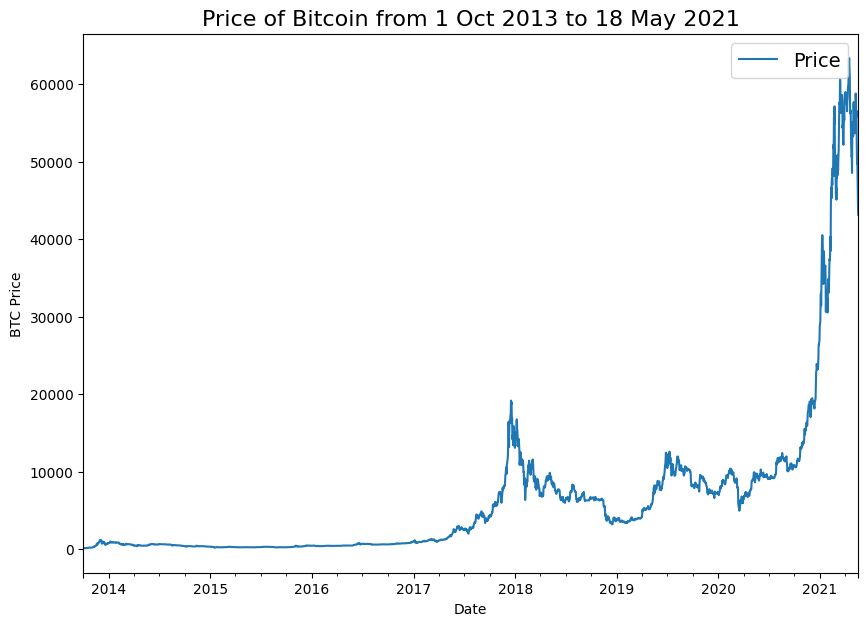

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [11]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

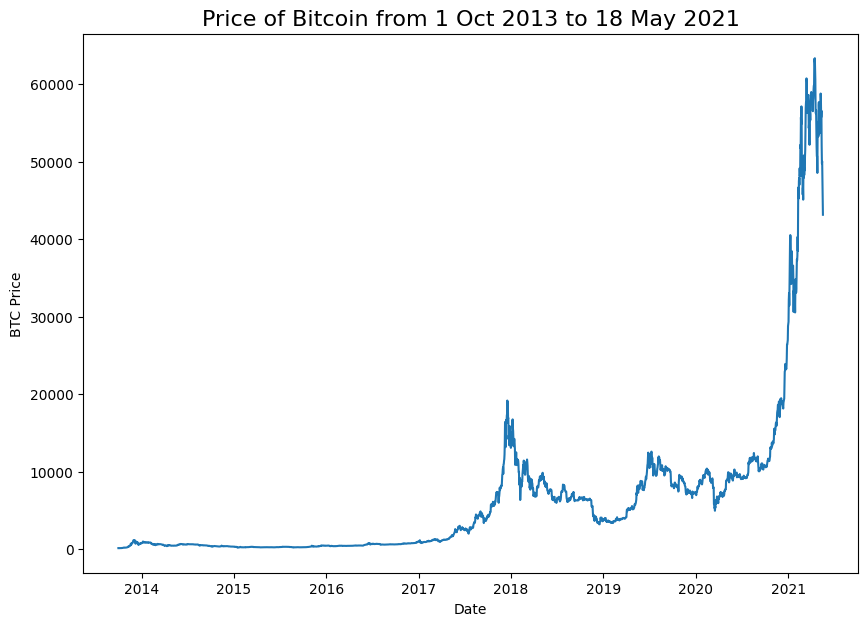

In [12]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [13]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [14]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [15]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

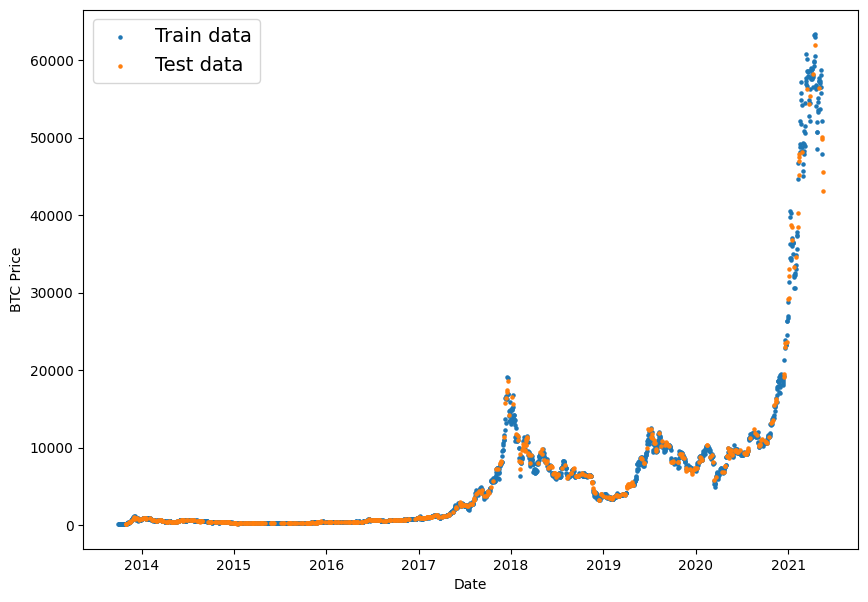

In [16]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [17]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

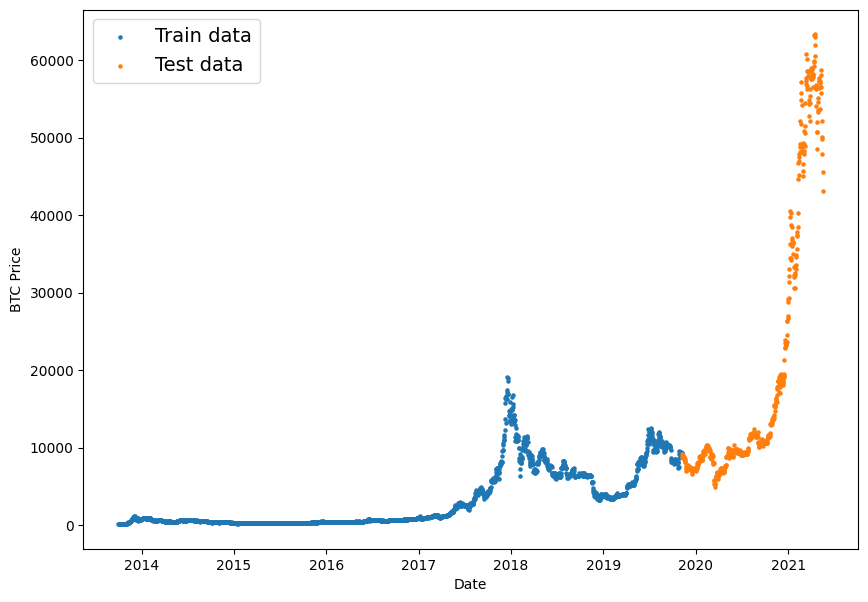

In [18]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [19]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

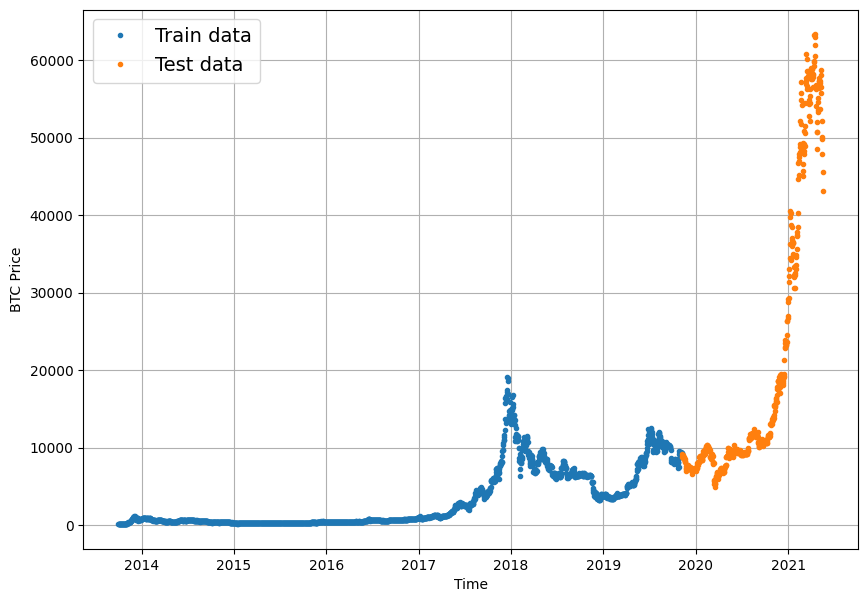

In [20]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We have some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we are going to predict
* **Window Size** = number of timesteps we are going to use to predict horizon

Modelling experiments we're running:

* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:
$$\hat{y}_{t}=y_{t-1}$$

That is:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1(previous timestep) - this is for a horizn of 1.

In [21]:
# creating a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [22]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

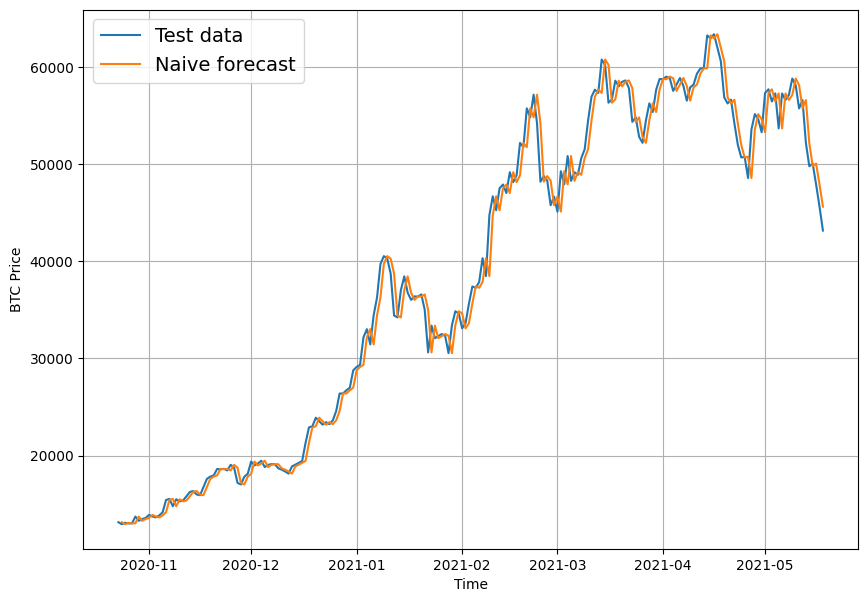

In [23]:
# Plot naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test,start=350, label="Test data", format="-")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive forecast",start=350, format="-")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

We are trying to predict a number, i.e that means we have a form of regression problem.

Because we are working on a regression problem, we will need some regression-like metrics.

A few common regression metrics(which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for eg, an MAE of 0 that is better than MAE of 100.

The main thing we are evaluating here is: how our model's forecasts(y_pred) compares against the actual values(y_true or ground truth values)?

In [24]:
import tensorflow as tf


2024-06-01 10:37:06.616942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 10:37:06.616990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 10:37:06.618500: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implementing MASE (assuming no seasonality of data)
    """
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    
    # find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) #our seasonality is 1 day so we are taking 1
    
    return mae/ mae_naive_no_season

In [26]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [27]:

#Creating a function to return a dictionary of evaluation metrics
def evaluate_preds(y_true, y_pred):
    """
    Implementing a method to return the evaluation metrics of the given true values
    and predictions.
    Returns a dictionary of MSE, RMSE,MASE, sMAPE
    """
    #Make sure float32 datatype (for metric calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    t_pred = tf.cast(y_pred, dtype=tf.float32)
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    return {"mae":mae.numpy(),
           "mse":mse.numpy(),
            "mape":mape.numpy(),
           "rmse":rmse.numpy(),
           "mase":mase.numpy()}
    

Let's see if it works

In [28]:
naive_results = evaluate_preds(
y_test[1:],
y_pred=naive_forecast)
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into supervised learning problem.

```
Windowing for one week
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8]
[2,3,4,5,6,7,8] -> [9]
```


In [29]:
len(y_train)

2229

In [30]:
# What we want to do with our Bitcoin data
print(f"We want to use : {btc_price[:7]} to predict: {btc_price[7]}")

We want to use : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict: 123.033


In [31]:
#Let's setup global variables for window and horizon size
HORIZON = 1 #predict next 1 day
WINDOW_SIZE=7 # use the past week of bitcoin data to make prediction

In [32]:
# Create a function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    """
    Create labels for windowed datasets.
    E.g. if horizon = 1
    inputs = [0,1,2,3,4,5,6,7] -> output:([0,1,2,3,4,5,6],[7])
    
    """
    return x[:, :-horizon], x[:,-horizon:]
    

In [33]:
#Test our window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window : [1 2 3 4 5 6 7] -> Label: 8


We have a way to label our windowed data. 

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this python forloops, however, for large time series, that would be quite slow.
To speed things up we can use numpy's array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0,1,2,3,4,5,6])
2. Use numpy indexing to create a 2D array of multiple window steps, for example,
```
[[0,1,2,3,4,5,6],
[1,2,3,4,5,6,7],
[2,3,4,5,6,7,8]]
```
3. Use the 2D array of multiple window steps (from 2.) to index on a target series (e.g the historical price of bitcoin)
4. Use our `get_labelled_window()` function we created above to turn the window steps into windows with a specified horizon.

In [34]:
import numpy as np
# create function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array f sequential labelled windows of window_size
    with horizon size labels
    """
    #1. create a window of specific window size(add the horizon on the end of labelling later)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    
    #2. Create a 2D array of multiple steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)- (window_size+horizon-1)), axis=0).T # Create 2D array of size window size
#     print(f"Window indexes:\n{window_indexes, window_indexes.shape}")
    
    #3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    print(windowed_array)
    
    #4. Get the labelled windows.
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    
    return windows, labels

In [35]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [36]:
# View the first 3 windows and labels
for i in range(3):
    print(f"Window : {full_windows[i]} -> Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label : [125.96116]


In [37]:
# view the last 3 windows and labels
for i in range(3):
    print(f"Window : {full_windows[i-3]} -> Label : {full_labels[i-3]}")

Window : [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label : [47885.62525472]
Window : [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label : [45604.61575361]
Window : [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label : [43144.47129086]


The above step can be done with tf.keras time series preprocessing function.

## Turning windows into train and test sets



In [38]:
# Make the train/test splits 
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching paries of windows and labels into train and test splits
    """
    split_size = int(len(windows) * (1-test_split)) #this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

    

In [39]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [40]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [41]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [42]:
# check to see if the train_labels are same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

Because our model's perfomance will fluctuate from experiments to experiments, we are going to write a model checkpoint so we can compare them.

More specifically, we want to compare each of our model's best perfomances against the other model's best perfomances.

For example if our model performs the best on epoch 55 (but we are training for 100 epochs), we want load and rvaluate the model at 55th epoch.

We can create a modelling checkpoint callback for this.

In [43]:
import os
# Create a functino to implement a modelcheckpoint callback with a specific file name
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              verbose=0, #only output limited amount of text
                                              monitor="val_loss",
                                             save_best_only=True)


## Model 1: Dense model (window=7, horizon=1)


Our first deep model is going to be a simple dense model:
* A single dense model with 128 hidden units and ReLu.
* An output layer with linear acitivation(no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we used 32)
* 100 epochs

*  *hyperparameters* = values a developer can adjusts
* *parameters* = parameters a model learns

In [44]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the random seed
tf.random.set_seed(42)

#1. Construct a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") #linear function is the same as having no activation
], name="model_1_Dense")

#2. Compiling the model
model_1.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])

#3. fit the model
model_1.fit(x= train_windows,
           y=train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100


I0000 00:00:1717238240.125244     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 [==============================] - 3s 49ms/step - loss: 2530.4468 - mae: 2530.4468 - mse: 17737306.0000 - val_loss: 4020.2068 - val_mae: 4020.2068 - val_mse: 30593960.0000
Epoch 2/100
18/18 [==============================] - 0s 28ms/step - loss: 380.3392 - mae: 380.3392 - mse: 522738.9375 - val_loss: 1278.1506 - val_mae: 1278.1506 - val_mse: 4358613.5000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 230.4619 - mae: 230.4619 - mse: 243352.0938 - val_loss: 1010.8228 - val_mae: 1010.8228 - val_mse: 3334273.0000
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 182.7861 - mae: 182.7861 - mse: 176216.2500 - val_loss: 992.3021 - val_mae: 992.3021 - val_mse: 3238462.2500
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 178.3210 - mae: 178.3210 - mse: 172677.0000 - val_loss: 1035.4519 - val_mae: 1035.4519 - val_mse: 3246153.7500
Epoch 6/100
18/18 [==============================] - 1s 44ms/step - loss: 172.2821 - 

In [45]:
#Evaluate the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 586.1495 - mae: 586.1495 - mse: 1213944.8750


[586.1494750976562, 586.1494750976562, 1213944.875]

In [46]:
# Load the saved best performing model and evaluate it on the test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_Dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 573.9531 - mae: 573.9531 - mse: 1198482.6250


[573.9530639648438, 573.9530639648438, 1198482.625]

In [47]:
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

## Making forecast with a model (on test data)

1. Make forecast on the test datasets(note: these won't be actual forecasts, they are only pseudo forecasts because actual forecasts are into the future), let's create a function to:

1. Take in a train model
2. Takes in some input data(same kind of data the model was trained on)
3. Passes the input data into the model's `predict()` method
4. Returns the prediction


In [48]:
def make_preds(model, input_data):
    """
    Uses model to make predictions on input data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of prediction

In [49]:
# Make predictions on model_1 using the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8891.494, 8781.629, 8996.189, 8798.481, 8737.4  , 8733.246,
       8681.315, 8548.421, 8448.151, 8512.721], dtype=float32)>

In [50]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [51]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [52]:
# Evaluate preds
model_1_results = evaluate_preds(np.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

In [53]:
#naive results
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

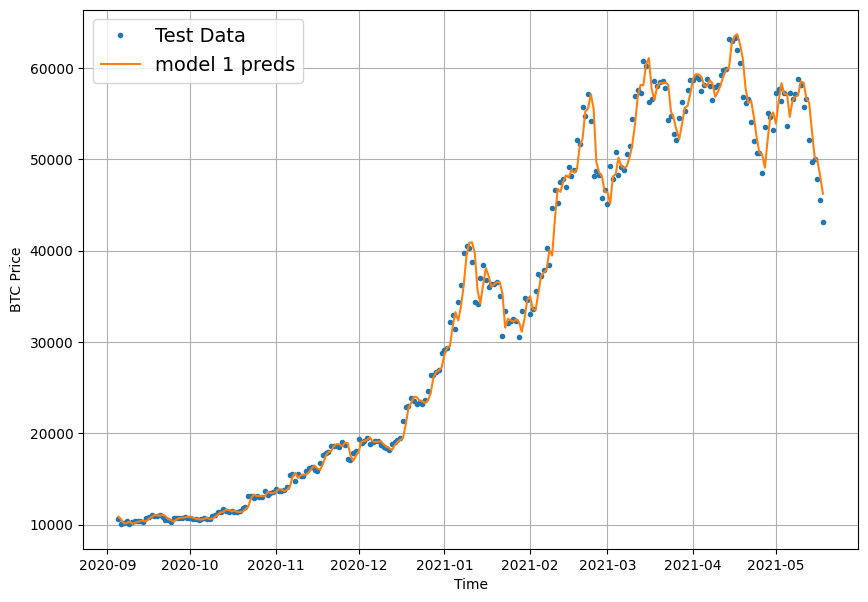

In [54]:
#Let's plot our model 1 predictions
offset=300
plt.figure(figsize=(10,7))
# Account for the test window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values=model_1_preds,
                start=offset,
                format="-",
                label="model 1 preds")

## Model 2: Dense(window=30, horizon=1)



In [55]:
#make model with windowsize 30 and horizon 1

#creating train and test splits with windowsize 30 and horizon 1 
expanded_window, expanded_labels = make_windows(prices, window_size=30)
expanded_window[:2], expanded_labels[:2]

[[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]]),
 array([[196.02499],
        [198.04883]]))

In [56]:
# Creating train and test splits
expanded_train_windows, expanded_test_windows, expanded_train_labels, expanded_test_labels = make_train_test_splits(expanded_window, expanded_labels)
expanded_train_windows.shape, expanded_test_windows.shape, expanded_train_labels.shape, expanded_test_labels.shape

((2205, 30), (552, 30), (2205, 1), (552, 1))

In [57]:
#1. Creating a model
model_2 = tf.keras.models.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="linear")
], name="model_2_dense_expanded_window")

#2. Compiling the model
model_2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mse","mae"])

#3. Fitting the model
model_2.fit(x=expanded_train_windows,
           y=expanded_train_labels,
           epochs=100,
           validation_data=(expanded_test_windows, expanded_test_labels),
           batch_size=128,
           callbacks=[create_model_checkpoint(model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 38ms/step - loss: 860.7968 - mse: 2959299.7500 - mae: 860.7968 - val_loss: 1526.8920 - val_mse: 6704227.0000 - val_mae: 1526.8920
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 320.2301 - mse: 468425.9375 - mae: 320.2301 - val_loss: 1549.7749 - val_mse: 6284495.5000 - val_mae: 1549.7749
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 203.5099 - mse: 197517.1719 - mae: 203.5099 - val_loss: 1028.1814 - val_mse: 3445105.5000 - val_mae: 1028.1814
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 221.7894 - mse: 216468.5469 - mae: 221.7894 - val_loss: 934.1363 - val_mse: 3013201.5000 - val_mae: 934.1363
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 183.8957 - mse: 164379.4062 - mae: 183.8957 - val_loss: 1136.8376 - val_mse: 3508962.7500 - val_mae: 1136.8376
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 171.6

In [58]:
#loading the best model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense_expanded_window")
model_2.evaluate(expanded_test_windows, expanded_test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 607.9165 - mse: 1283948.7500 - mae: 607.9165


[607.91650390625, 1283948.75, 607.91650390625]

In [59]:
#making predictions on the best model
model_2_preds = make_preds(model_2, expanded_test_windows)
model_2_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8753.111, 8869.783, 8802.   , 8522.605, 8410.436], dtype=float32)>

In [60]:
#evaluating the best model metrics
model_2_results = evaluate_preds(tf.squeeze(expanded_test_labels), model_2_preds)

In [61]:
model_2_results

{'mae': 607.91656,
 'mse': 1283948.8,
 'mape': 2.7777462,
 'rmse': 1133.1146,
 'mase': 1.0626441}

In [62]:
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

In [63]:
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

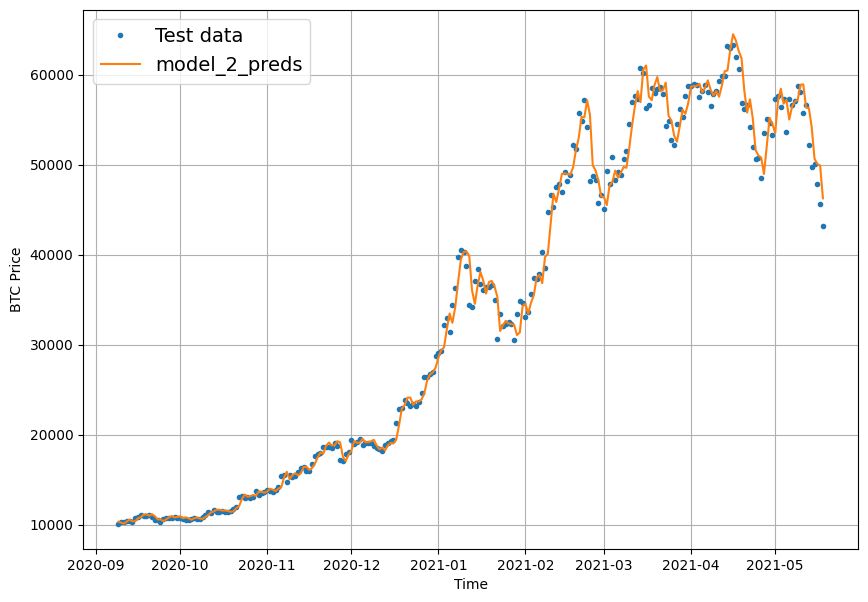

In [64]:
#plotting the predictions
offsset=300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(expanded_test_windows):], values=expanded_test_labels[:,0], label="Test data", start=offset)
plot_time_series(X_test[-len(expanded_test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense(window=30, horizon=7)


In [65]:
#creating windows and labels
windows, labels = make_windows(prices, window_size=30, horizon=7)
windows.shape, labels.shape

[[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


((2751, 30), (2751, 7))

In [66]:
#creating train and test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2200, 30), (551, 30), (2200, 7), (551, 7))

In [67]:
# Creating model 3
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(7, activation="linear") # horizon length is the number of neurons in the output layer
], name="model_3_dense_expanded_windows_and_horizon")

#compiling the model
model_3.compile(loss="mae",
               metrics=["mse","mae"],
               optimizer="adam")

#fitting the model
model_3.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 36ms/step - loss: 2572.7913 - mse: 23488918.0000 - mae: 2572.7913 - val_loss: 4347.7212 - val_mse: 57183172.0000 - val_mae: 4347.7212
Epoch 2/100
18/18 [==============================] - 0s 28ms/step - loss: 641.9482 - mse: 1771209.6250 - mae: 641.9482 - val_loss: 2621.0774 - val_mse: 20137846.0000 - val_mae: 2621.0774
Epoch 3/100
18/18 [==============================] - 0s 29ms/step - loss: 471.1367 - mse: 1044207.2500 - mae: 471.1367 - val_loss: 2284.1968 - val_mse: 15305936.0000 - val_mae: 2284.1968
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 418.7581 - mse: 844959.8750 - mae: 418.7581 - val_loss: 2141.1179 - val_mse: 13751167.0000 - val_mae: 2141.1179
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 389.6247 - mse: 738465.8750 - mae: 389.6247 - val_loss: 2191.1145 - val_mse: 14013013.0000 - val_mae: 2191.1145
Epoch 6/100
18/18 [==============================] - 0s 28ms/step

In [68]:
#loading and evaluating the best model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense_expanded_windows_and_horizon")
#evaluating the best model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1239.9359 - mse: 5353795.0000 - mae: 1239.9359


[1239.9359130859375, 5353795.0, 1239.9359130859375]

In [69]:
#making perdictions on the test data with model_3
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9611.699 , 9701.632 , 9408.929 , 9765.403 , 9682.427 , 9405.835 ,
        9631.555 ],
       [9181.401 , 9164.453 , 9128.581 , 9158.663 , 9407.469 , 9170.177 ,
        9241.801 ],
       [8995.273 , 8917.339 , 9020.909 , 9057.284 , 9352.736 , 9016.807 ,
        9123.804 ],
       [9048.351 , 8867.056 , 9288.567 , 9091.9375, 9329.2   , 9191.472 ,
        9357.217 ],
       [8842.385 , 8879.815 , 9236.821 , 8968.453 , 9137.267 , 9059.027 ,
        9141.238 ]], dtype=float32)>

In [70]:
np.squeeze(test_labels)

array([[ 8794.35864452,  8798.04205463,  9081.18687849, ...,
         8760.89271814,  8749.52059102,  8656.97092235],
       [ 8798.04205463,  9081.18687849,  8711.53433917, ...,
         8749.52059102,  8656.97092235,  8500.64355816],
       [ 9081.18687849,  8711.53433917,  8760.89271814, ...,
         8656.97092235,  8500.64355816,  8469.2608989 ],
       ...,
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361],
       [56573.5554719 , 52147.82118698, 49764.1320816 , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])

In [71]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [72]:
#evaluating the model_3 preds
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': array([  807.8535  ,   456.2507  ,   389.42426 ,   541.0911  ,
          483.5103  ,   641.2756  ,   631.3163  ,   595.51385 ,
          561.3131  ,   582.4757  ,   832.3798  ,   920.97406 ,
         1046.5453  ,  1037.8348  ,   692.7901  ,   259.6365  ,
          248.75578 ,   238.23709 ,   183.68025 ,   208.92285 ,
          220.18513 ,   278.5688  ,   433.21338 ,   415.93506 ,
          308.3983  ,   192.82652 ,   140.82072 ,   155.8473  ,
          145.38875 ,   262.5231  ,   361.8856  ,   491.15283 ,
          399.70795 ,   420.94907 ,   366.18652 ,   365.75    ,
          405.32422 ,   327.40283 ,   262.3904  ,   173.51744 ,
          364.8591  ,   108.108536,   113.65625 ,   138.32156 ,
          222.33224 ,   202.0272  ,   163.0498  ,   183.9949  ,
          107.19154 ,   147.72502 ,   161.33678 ,   150.75635 ,
          319.71988 ,   209.93484 ,   306.63965 ,   301.1155  ,
          480.25873 ,   455.38754 ,   457.4926  ,   403.31027 ,
          257.02972 ,   168.66936

## Make our evaluation function work for larger horizon


In [73]:
model_3_results["mae"].ndim

1

In [74]:
#Creating a function to return a dictionary of evaluation metrics
def evaluate_preds(y_true, y_pred):
    """
    Implementing a method to return the evaluation metrics of the given true values
    and predictions.
    Returns a dictionary of MSE, RMSE,MASE, sMAPE
    """
    #Make sure float32 datatype (for metric calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    t_pred = tf.cast(y_pred, dtype=tf.float32)
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    # Account for diffferent sized metrics for longer horizons, we want to reduce the metrics to a single value
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mase = tf.reduce_mean(mase)
        mape = tf.reduce_mean(mape)
    return {"mae":mae.numpy(),
           "mse":mse.numpy(),
            "mape":mape.numpy(),
           "rmse":rmse.numpy(),
           "mase":mase.numpy()}
    

In [75]:
# Get model_3 results aggregated to single value
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1239.936,
 'mse': 5353795.0,
 'mape': 5.708652,
 'rmse': 1430.0248,
 'mase': 2.2063966}

In [76]:
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

>**NOTE:** The farther you try to predict the higher the chance of the error

We have made and evaluated with `model_3`, let's visualize this.

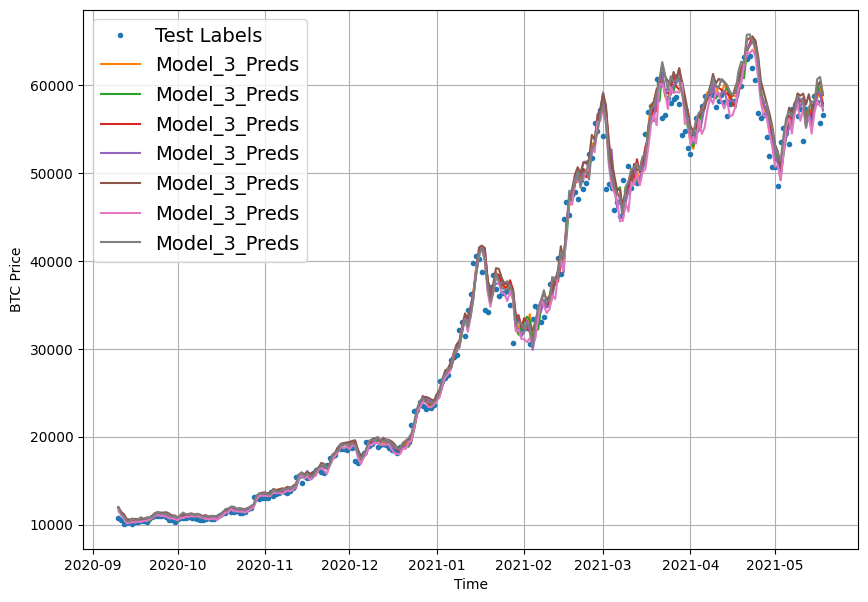

In [77]:
# visualizing the model_3 predictions
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], label="Test Labels", start=offset)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset,format="-", label="Model_3_Preds")

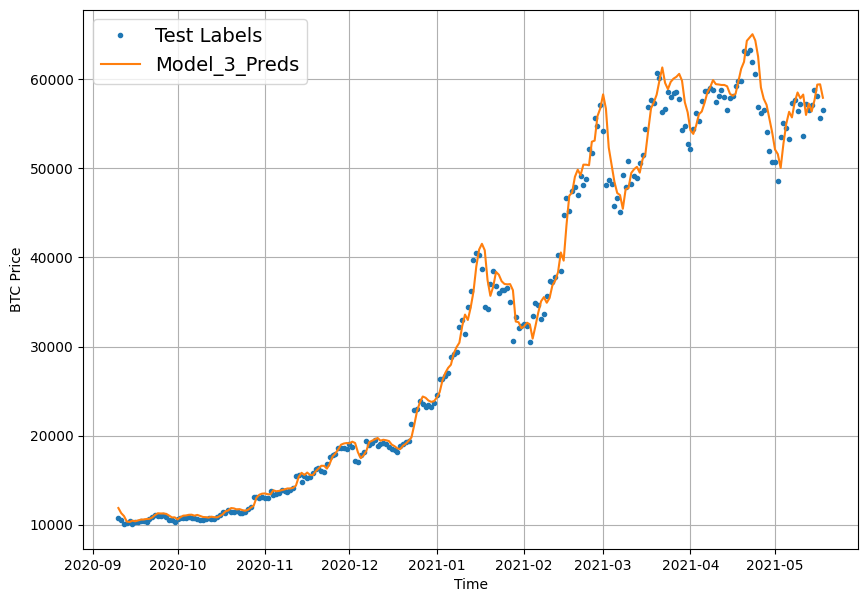

In [78]:
# visualizing the model_3 predictions by reducing the mean of the predictions
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], label="Test Labels", start=offset)
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset,format="-", label="Model_3_Preds")

>**NOTE:** The above plot is not the actual indication of the results. We have reduced the model predictions of multiple horizons to a single mean value to reduce it to a single dimension.

## Which of our models is performing so far?

We have trained some models. so let's compare them and see which one performs better.

In [79]:
# Create a barchar with all of the model results till now.
all_model_results = pd.DataFrame({"naive model":naive_results,
                                  "model 1 dense":model_1_results,
                                  "model 2 dense(window=30, horizon=1)":model_2_results,
                                  "model 3 dense(window=30, horizon=7)":model_3_results}).T
all_model_results

,mae,mse,mape,rmse,mase
naive model,567.980218,1.147547e+06,2.516525,1071.236238,0.999570
model 1 dense,573.953064,1.198483e+06,2.579548,1094.752319,1.008277
"model 2 dense(window=30, horizon=1)",607.916565,1.283949e+06,2.777746,1133.114624,1.062644
"model 3 dense(window=30, horizon=7)",1239.936035,5.353795e+06,5.708652,1430.024780,2.206397


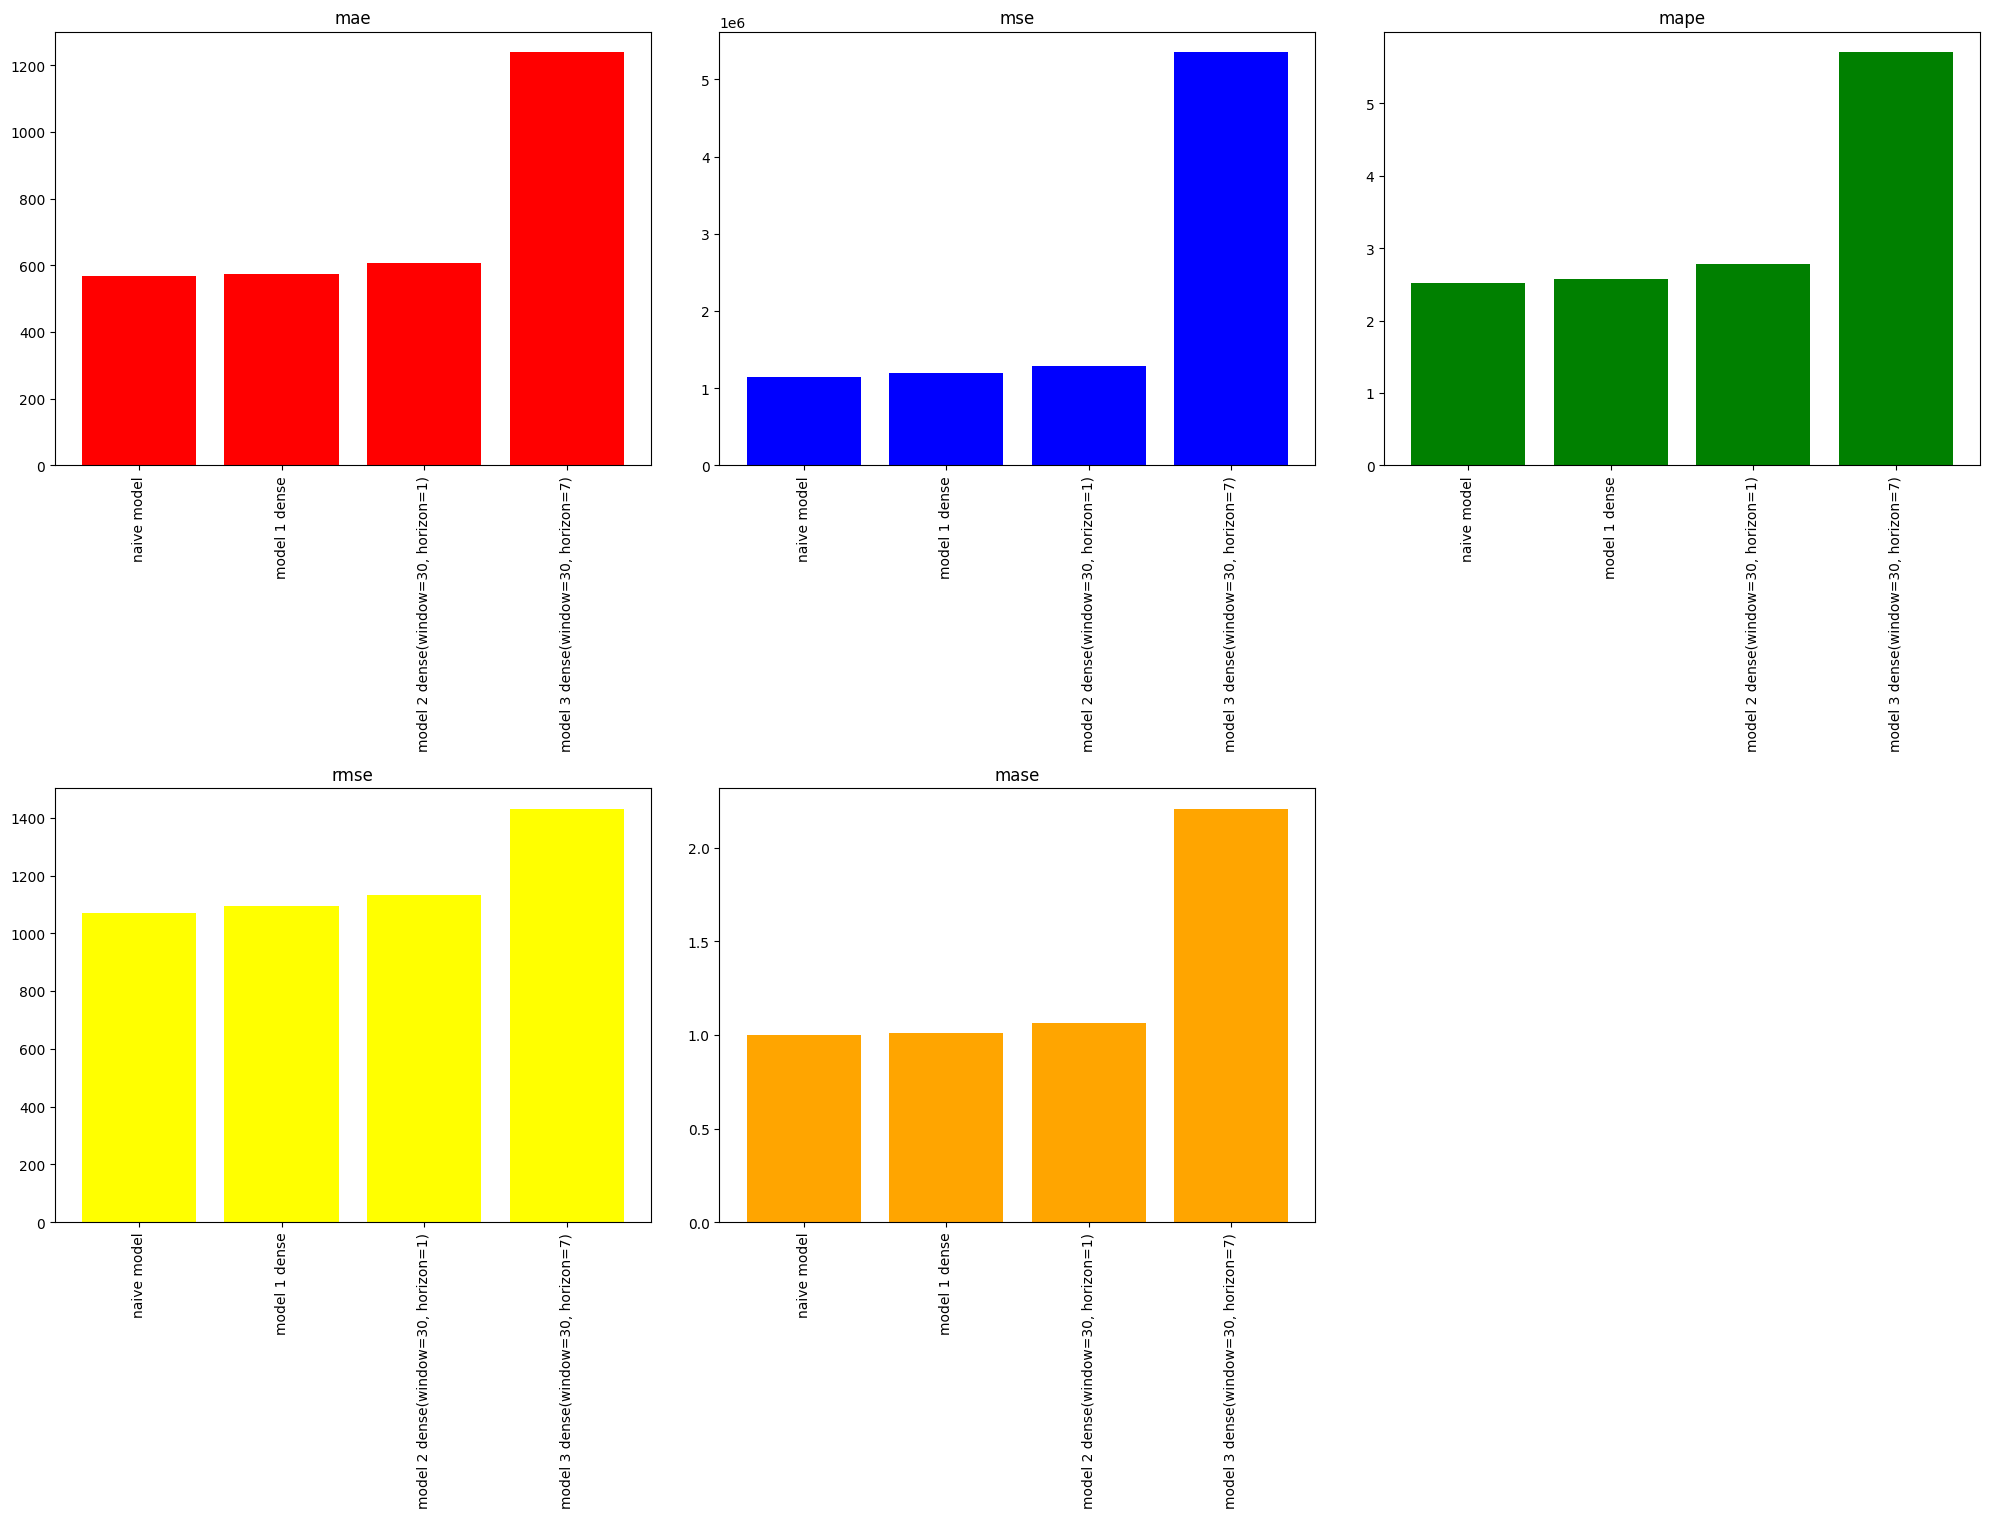

In [80]:
import matplotlib.pyplot as plt

color=["red","blue","green","yellow","orange"]
plt.figure(figsize=(20,20))
for index, column in enumerate(all_model_results.columns):
    plt.subplot(3,3,index+1)
    plt.bar(all_model_results.index, all_model_results[column], color=color[index])
    plt.title(column)
    plt.tight_layout()
    plt.xticks(rotation=90)

>**NOTE:** We can see that the naive results are good. This is because of the presence of **auto correaltion** in the data.If a time series has auto correlation it means that value at `t+1`(the next time step) is typically close to the value at `t` (the current time step). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is(stock market prices often seem autoclorrelated but often fluctuate randomly), a naive model will often get fairly good results.

## Model 4: Conv1D

We have seen that the model with horizon 1 and window size 7 performs better so let's use it

In [81]:
# Create a windowed data
full_window, full_labels = make_windows(prices, window_size=7, horizon=1)
full_window.shape, full_labels.shape

[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


((2780, 7), (2780, 1))

In [82]:
# Create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

We need an input shape of (batch_size, timesteps, input_dim)
However we have not formatted to that shape

In [83]:
# Before we pass our data to the conv1d layer we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [84]:
expand_dims_layer = layers.Lambda(lambda x:tf.expand_dims(x, axis=1)) # add an extra dimension

In [85]:
# Test our lambda layer
print(f"Original shape:{x.shape}") # Window size
print(f"Expanded shape:{expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n{expand_dims_layer(x)}")

Original shape:(7,)
Expanded shape:(7, 1)
Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [86]:
# Create a Conv1D model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters = 128, kernel_size=7, padding="causal", activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
], name="model_4_conv1D")

#compiling the model
model_4.compile(loss="mae",
               metrics=["mae","mse"],
               optimizer="adam")

#Fitting the model
model_4.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_4.name)])

Epoch 1/100
18/18 [==============================] - 3s 62ms/step - loss: 1722.6512 - mae: 1722.6512 - mse: 8909891.0000 - val_loss: 1340.0890 - val_mae: 1340.0890 - val_mse: 4817167.5000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 320.2930 - mae: 320.2930 - mse: 414597.2188 - val_loss: 1562.3190 - val_mae: 1562.3190 - val_mse: 6067648.5000
Epoch 3/100
18/18 [==============================] - 1s 38ms/step - loss: 223.2559 - mae: 223.2559 - mse: 240925.0938 - val_loss: 1078.7158 - val_mae: 1078.7158 - val_mse: 3747420.7500
Epoch 4/100
18/18 [==============================] - 1s 38ms/step - loss: 194.6967 - mae: 194.6967 - mse: 193077.4219 - val_loss: 1050.2545 - val_mae: 1050.2545 - val_mse: 3705571.7500
Epoch 5/100
18/18 [==============================] - 1s 39ms/step - loss: 188.3388 - mae: 188.3388 - mse: 185755.9844 - val_loss: 1044.1796 - val_mae: 1044.1796 - val_mse: 3574225.0000
Epoch 6/100
18/18 [==============================] - 1s 38ms/step - loss:

In [87]:
#loading the best model
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
#evaluating the model on the test data
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 570.5365 - mae: 570.5365 - mse: 1180823.0000


[570.5364990234375, 570.5364990234375, 1180823.0]

In [88]:
#making predictions on the best model
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8882.326, 8784.326, 9017.724, 8786.968, 8733.578, 8748.857,
       8682.088, 8528.545, 8465.129, 8523.587], dtype=float32)>

In [89]:
#evaluating the metrics 
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 570.53656,
 'mse': 1180822.9,
 'mape': 2.5484734,
 'rmse': 1086.6567,
 'mase': 1.0022748}

In [90]:
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

In [91]:
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

In [92]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

In [93]:
WINDOW_SIZE, HORIZON

(7, 1)

In [94]:
# creating windows and labels
full_windows, full_labels = make_windows(prices)
full_windows.shape, full_labels.shape

[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


((2780, 7), (2780, 1))

In [95]:
# creating train and test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
train_windows.shape, train_labels.shape, test_windows.shape, test_labels.shape

((2224, 7), (2224, 1), (556, 7), (556, 1))

In [96]:
# Creating LSTM model with functional api

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1))(inputs)
# x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
# x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_5_RNN_LSTM")

# model_5 = tf.keras.models.Sequential([
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=0)),
#     tf.keras.layers.LSTM(128),
#     tf.keras.layers.Dense(1, activation="linear")
# ], name="model_5_LSTM")

#compiling the model
model_5.compile(loss="mae",
               optimizer="adam",
               metrics=["mae","mse"])

#fitting the model
model_5.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           validation_data=(test_windows, test_labels),
           verbose=1,
           batch_size=128,
           callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 115ms/step - loss: 2186.5332 - mae: 2186.5332 - mse: 11877203.0000 - val_loss: 9488.8076 - val_mae: 9488.8076 - val_mse: 159383648.0000
Epoch 2/100
18/18 [==============================] - 2s 106ms/step - loss: 669.1927 - mae: 669.1927 - mse: 1561654.6250 - val_loss: 2369.9094 - val_mae: 2369.9094 - val_mse: 13433094.0000
Epoch 3/100
18/18 [==============================] - 2s 101ms/step - loss: 273.7215 - mae: 273.7215 - mse: 298154.0000 - val_loss: 1503.1157 - val_mae: 1503.1157 - val_mse: 5567977.0000
Epoch 4/100
18/18 [==============================] - 2s 125ms/step - loss: 189.5691 - mae: 189.5691 - mse: 181944.0938 - val_loss: 990.8804 - val_mae: 990.8804 - val_mse: 3259143.7500
Epoch 5/100
18/18 [==============================] - 2s 99ms/step - loss: 178.0092 - mae: 178.0092 - mse: 169103.2031 - val_loss: 990.8181 - val_mae: 990.8181 - val_mse: 3222254.5000
Epoch 6/100
18/18 [==============================] - 2s 99ms/step -

In [97]:
#Load in the best model and evaluate it on test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_RNN_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 589.6022 - mae: 589.6022 - mse: 1248232.5000


[589.6022338867188, 589.6022338867188, 1248232.5]

In [98]:
# make predictions with our LSTM models
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8962.1875, 8812.926 , 9009.546 , 8817.685 , 8743.399 ],
      dtype=float32)>

In [99]:
#evaluating the model
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 589.60223,
 'mse': 1248232.5,
 'mape': 2.6554487,
 'rmse': 1117.2433,
 'mase': 1.0357678}

In [100]:
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

In [101]:
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

>**NOTE:** Because neural networks are such powerful algorithmns they can be used for almost any problem, however that doesn't mean they will acheive perfomant or usable results.

## Make a multivariate dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could is weather an important person tweeted on that day

* day 1 - 0
* day 2 - 1
* day 3 - 0

What is a better feature?
How about the bitcoin halving events?


In [102]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [103]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 january 2009 - this block reward is not in our datset. It starts from 01 october 2013
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.25 # 9th july 2016
block_reward_4 = 6.25 # 10 may 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-20")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [104]:
block_reward_2_datetime

numpy.datetime64('2012-11-20')

In [105]:
# Create date ranges of where specific block reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [106]:
# Add in block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in the block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [107]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

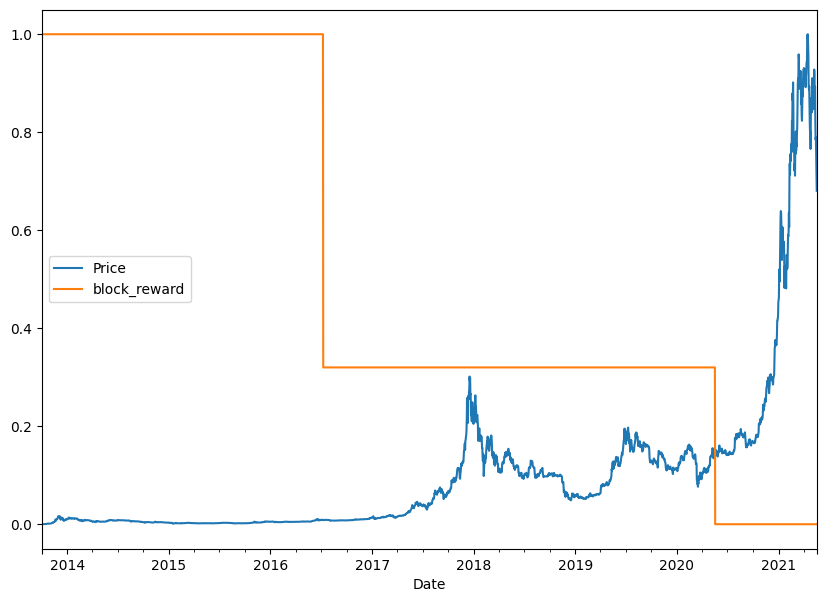

In [108]:
#Plot the block reward vs price overtime
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                    columns=bitcoin_prices_block.columns,
                                    index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

Previously we turned our univariate timeseries into windowed dataset using helper functions above.

However since we got multivariate data, these functions won't work.

We can use the pandas.DataFrame.shift() method to window our multi variate data.


In [109]:
# setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [110]:
# Make a copy of bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed column
for i in range(WINDOW_SIZE): #shift values for each step in wINDOW_SIZE
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
    
bitcoin_prices_windowed.head(10)
    

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [111]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


What we've done is created a way to window our dataset directly from a pandas dataframe

```
[0,1,2,3,4,5,6, block_reward] ->[7]
[1,2,3,4,5,6,7, block_reward] ->[8]
```

In [112]:
# Create X (windows) and y(horizon) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [113]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [114]:
# Creating train and test splits using indexing
split_size=int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2224, 8), (2224,), (556, 8), (556,))

In [115]:
# Creating a model similar to model 1 with multivariate data
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE+1))
x = tf.keras.layers.Dense(128, activation="relu")(inputs)
outputs = tf.keras.layers.Dense(HORIZON, activation="linear")(x)

model_6 = tf.keras.Model(inputs, outputs, name="model_6_multivariate")

#compiling the model
model_6.compile(loss="mae",
               metrics=["mse","mae"],
               optimizer="adam")

#fitting the model
model_6.fit(x=X_train,
           y= y_train,
           epochs=100,
           validation_data=(X_test, y_test),
           batch_size=128,
           callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 39ms/step - loss: 1478.2593 - mse: 7566567.5000 - mae: 1478.2593 - val_loss: 2357.7686 - val_mse: 14234993.0000 - val_mae: 2357.7686
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 386.6226 - mse: 590758.1875 - mae: 386.6226 - val_loss: 2020.0414 - val_mse: 9674098.0000 - val_mae: 2020.0414
Epoch 3/100
18/18 [==============================] - 1s 29ms/step - loss: 237.1713 - mse: 278440.5938 - mae: 237.1713 - val_loss: 1374.8130 - val_mse: 5206396.5000 - val_mae: 1374.8130
Epoch 4/100
18/18 [==============================] - 1s 30ms/step - loss: 207.7108 - mse: 219665.0469 - mae: 207.7108 - val_loss: 1148.3689 - val_mse: 4182016.0000 - val_mae: 1148.3689
Epoch 5/100
18/18 [==============================] - 1s 29ms/step - loss: 201.5320 - mse: 213185.0000 - mae: 201.5320 - val_loss: 1133.3384 - val_mse: 4040683.7500 - val_mae: 1133.3384
Epoch 6/100
18/18 [==============================] - 0s 29ms/step - los

In [116]:
# Evaluating the model on test data
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 643.9356 - mse: 1324386.1250 - mae: 643.9356


[643.9356079101562, 1324386.125, 643.9356079101562]

In [117]:
# Loading the best model and evaluating on the test data
model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.4744 - mse: 1175317.1250 - mae: 567.4744


[567.474365234375, 1175317.125, 567.474365234375]

In [118]:
#making predictions on the model
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8858.037, 8775.198, 9034.491, 8776.498, 8722.9  ], dtype=float32)>

In [119]:
# Evaluating model_6 preds
model_6_results = evaluate_preds(tf.squeeze(y_test), model_6_preds)
model_6_results

{'mae': 567.4743,
 'mse': 1175317.0,
 'mape': 2.537215,
 'rmse': 1084.1204,
 'mase': 0.9968952}

In [120]:
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

In [121]:
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

In [122]:
model_6.summary()

Model: "model_6_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
X_test[:3]

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2019-11-10,12.25,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039,9290.896484
2019-11-11,12.25,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039
2019-11-12,12.25,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930


## Model 7: N-Beats Algortihmn

Let's now try to build the biggest model for time series forecasting.

More specifically, we are going to be replicating the algorithmn in the following paper.
https://arxiv.org/pdf/1905.10437 

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to maek our own custom layer)
* Get experience using the functional API to create a custom architecture
* Potentially get state of the art results on our problem.

### Building and testing N-BEATS block layer

Because the NBeatsBlock layer doesn't exist in tensorflow, we need to create it.

To create custom layers and models in tensorflow we can use layer subclassing.

In [124]:
# Create NBeats custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                input_size:int,
                theta_size: int,
                horizon: int,
                n_neurons: int,
                n_layers: int,
                **kwargs): #the **kwargs take care of all arguments for the parent class
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contains stack of 4 fully connected layers each has ReLu activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
        
    def call(self, inputs): # call methos is what runs when the layer is called
        x = inputs
        for layers in self.hidden: #pass inputs through each layer
            x = layers(x)
        theta = self.theta_layer(x)
        #output the backcast and forward cast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:,-self.horizon:]
        return backcast, forecast

Let's test our NBeatsBlock class

To do we'll make some dummy inputs and outputs

In [125]:
# Set up dummy NBeats block layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size=WINDOW_SIZE + HORIZON, #backcast + forecast
                                      horizon = HORIZON,
                                      n_neurons = 128,
                                      n_layers = 4) 

In [126]:
# create dummy inputs (have to be same as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) #input shape to the model has to reflect dense layer input requirements ndims>=2
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [127]:
# pass the dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer (they will be random due to no training of the model)
print(f"Backcast : {tf.squeeze(backcast.numpy())}")
print(f"Forecast : {tf.squeeze(forecast.numpy())}")


Backcast : [-0.13079455 -0.20868927 -0.4205141   0.91991794 -0.06398748 -0.26646593
 -0.05786982]
Forecast : 0.2928169071674347


## Preparing data for the N-BEATS Algorithm using `tf.data`

To make our input data load as fast as possible we are going to be adhering to the perfomant data pipeline steps in the tf.data guide.

In [128]:
HORIZON = 1
WINDOW_SIZE = 7

In [129]:
# creatr nbeats data inputs (NBEATS work with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [130]:
# add windowed column
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Prices+{i+1}"] = bitcoin_prices["Price"].shift(periods=i+1)
    
bitcoin_prices_nbeats

,Price,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [131]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2224, 7), (2224,), (556, 7), (556,))

In [132]:
# using tf.data api 
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by xipping together ->(feature, label)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a number of parameters, many of them can be found in table 18 of the paper.

In [133]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model we need 2 layers for the residual connections (subtract and add

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture.

for more: https://paperswithcode.com/method/resnet

In [134]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# add
added = tf.keras.layers.add([tensor_1, tensor_2])

print(f"Input tensors : {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted tensors : {subtracted.numpy()}")
print(f"Added tensors : {added.numpy()}")

Input tensors : [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted tensors : [10 10 10 10 10 10 10 10 10 10]
Added tensors : [10 12 14 16 18 20 22 24 26 28]


In [135]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### Building, compiling and fitting N-BEATS algorithm

1. Setup an instance of N-BEATS block layer using `NBeatsBlock` (this will be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the keras functional API)
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loop to create stacks of block layers.
5. Use the NBeatsBlock class within for loop in (4) to create blocks which return backcasts and block level forecasts
6. Create the double residual stacking using subtract and add layers.
7. Put the model together with inputs and outputs (`tf.keras.Model()`)
8. Compile the model with MAE loss (the paper uses multiple losses but we will keep MAE to be inline with our models) and Adam optimizer with default learning rate as per paper
9. Fit the N-Beats model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
    * Early stopping callback - because the model will be training for so long, we'll stop early if it stops improving.
    * Reduce LR on plateu - if a model stops improving try lowering the learning rate to reduce the learning to reduce the amount it updates it's weights each time (take smaller steps towards best performance)
    


In [136]:
%%time
from tensorflow.keras import layers
tf.random.set_seed(42)

#1. set up an instance of nbeats block
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS,
                                name="InitialBlock")

#2. Create inputs to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

#3. Create inintal backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

#4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1)): # First stack is already created in 3
    
    #5. use the NBeatsBlock to calculate the backcast and forecast
    backcast, block_forecast = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name=f"NBeatsBlock_{i}")(residuals) #pass in the residuals
    
    #6. Create double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")
    
#7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                        outputs=forecast, 
                        name="model_7_NBEATS")

#8. compile the model with MAE loss
model_7.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

#9. Fit the model with EarlyStopping and ReduceLROnPlateu callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(patience=100,verbose=1)])


Epoch 768: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1113: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1213: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 36s, sys: 8.11 s, total: 4min 44s
Wall time: 4min 50s


In [137]:
#Evaluating the N-Beats model on test data
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 575.4194


575.4193725585938

In [138]:
# Making predictions on the N-Beats model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.055, 8767.737, 9014.958, 8747.885, 8752.581, 8748.947,
       8649.766, 8490.044, 8475.082, 8502.516], dtype=float32)>

In [139]:
# Evaluating the n-beats model preds
model_7_results = evaluate_preds(y_test,model_7_preds)
model_7_results

{'mae': 575.4194,
 'mse': 1169802.9,
 'mape': 2.6593633,
 'rmse': 1081.5742,
 'mase': 1.0108525}

In [140]:
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

In [141]:
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

Even our biggest model is not able to provide much better results. The smallest model `model_1` has better results than the `NBeats` model. This shows the power of small models as well as all large models maynot be suited for the problem.

### Plotting the N-Beats architecture we have created

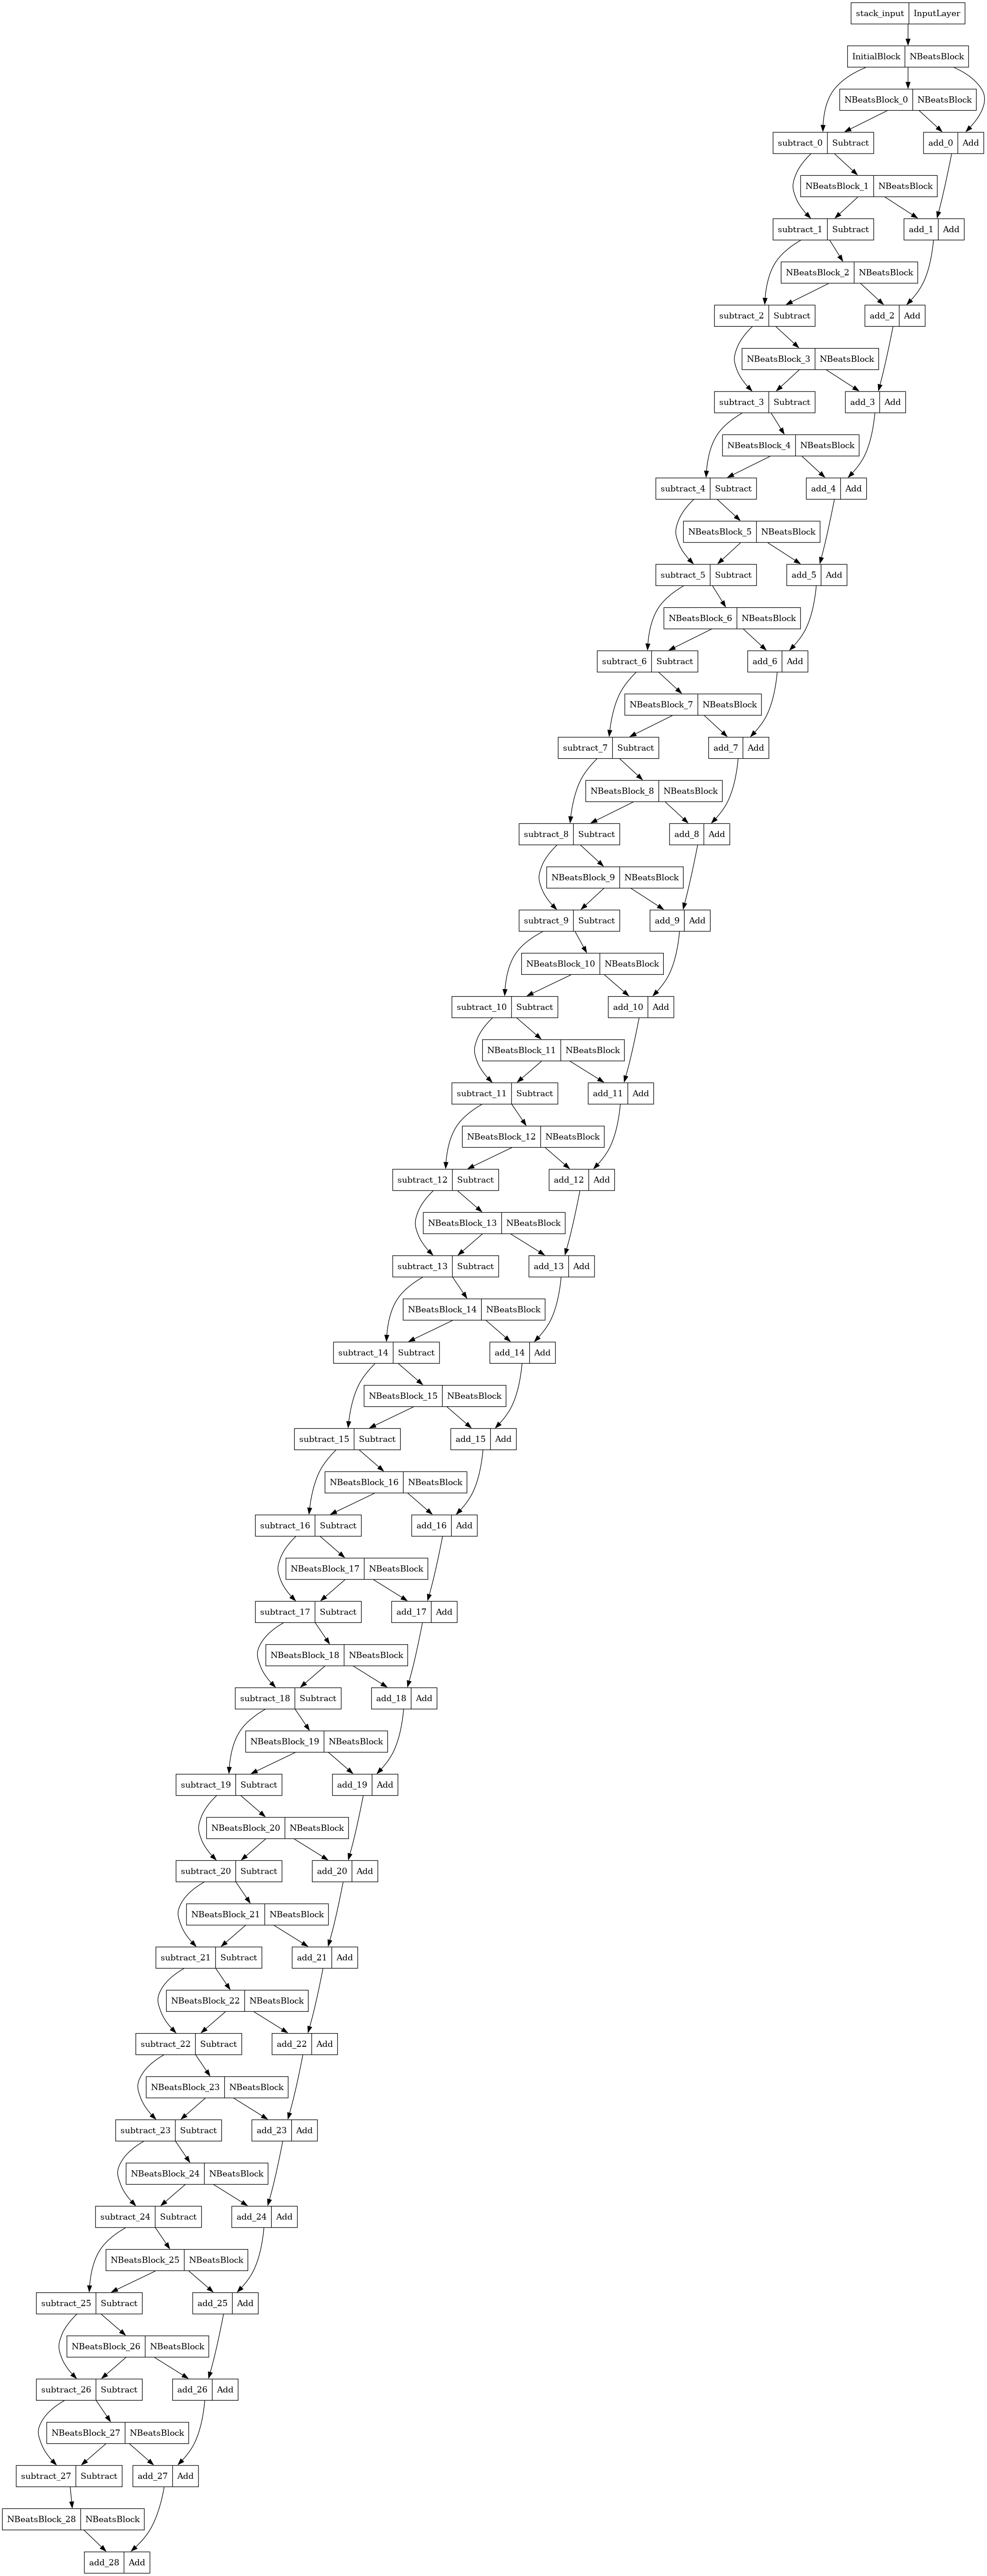

In [142]:
# Plot the n-beats model and compare our architecture to that of the paper
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (Stacking differrent models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many differrent models to predict a common goal.

In [143]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models(using differrent loss functions)

In [144]:
def get_ensemble_models(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data = test_dataset,
                       num_iter=10,
                       num_epochs=1000,
                       loss_fns=["mae","mse","mape"]):
    """
    Returns a list of num_iter models each traines on MAE, MSE, MAPE loss.
    
    For example, if num_iter=10, a list of 30 trained models will be retuened:
    10 * len(["mae","mse","mape"])
    """
    
    # Making empty list for trained ensemeble models
    ensemble_models = []
    
    # Create num_iter number of models per loss functions
    for i in range(num_iter):
        # Build and fit a new model with a differrent loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing : {loss_function} for {num_epochs}, model number : {i}")
            
            # Constuct a simple model (similar to model_1)
            model = tf.keras.models.Sequential([
                # initialize dense layers with normal distribution  for estimation prediction intervals later on
                layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
                layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
                layers.Dense(HORIZON)
            ])
            
            # Compile simple model with current loss function
            model.compile(loss=loss_function,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics=["mae","mse"])
            
            # Fit the current model
            model.fit(train_data,
                     epochs=num_epochs,
                     verbose=0,
                     validation_data=test_data,
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                               patience=200,
                                                               restore_best_weights=True),
                              tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                  patience=100,
                                                                  verbose=1)])
            
            # Append fitted model to list of ensemble models
            ensemble_models.append(model)
    
    return ensemble_models
            

In [145]:
%%time

# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                     num_epochs=1000)

Optimizing model by reducing : mae for 1000, model number : 0

Epoch 741: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 997: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing : mse for 1000, model number : 0

Epoch 307: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 407: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing : mape for 1000, model number : 0

Epoch 169: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 287: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 387: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing : mae for 1000, model number : 1

Epoch 578: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 702: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 802: ReduceLROnPlateau r

In [146]:
ensemble_models

In [147]:
len(ensemble_models)

15

### Make predictions with our ensemble model

In [148]:
# Create a function which uses a list of trained models to make and return a list of predictions 
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))
    

In [149]:
%%time
# Create a list of ensemble predictions

ensemble_preds = make_ensemble_preds(ensemble_models,
                                    data=test_dataset)

1/1 [==============================] - 0s 38ms/step
CPU times: user 699 ms, sys: 41.4 ms, total: 740 ms
Wall time: 701 ms


In [150]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8806.503,  8793.201,  9085.416, ..., 50317.37 , 48480.098,
        46532.69 ],
       [ 8748.298,  8710.208,  9001.995, ..., 49362.97 , 48922.52 ,
        45677.426],
       [ 8784.242,  8805.263,  9064.014, ..., 50276.996, 48066.492,
        46300.49 ],
       ...,
       [ 8854.382,  8747.177,  9044.904, ..., 49844.81 , 49035.73 ,
        46061.168],
       [ 8769.7  ,  8679.457,  9049.016, ..., 49630.902, 48124.348,
        46172.84 ],
       [ 8756.299,  8766.144,  9067.737, ..., 50106.75 , 49006.45 ,
        46586.613]], dtype=float32)>

In [151]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean.shape

TensorShape([556])

In [152]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median.shape

(556,)

In [153]:
# Evaluate our ensembel model predictions
ensemble_results = evaluate_preds(y_test, ensemble_mean)
ensemble_results

{'mae': 567.26917,
 'mse': 1136474.1,
 'mape': 2.5775023,
 'rmse': 1066.0554,
 'mase': 0.9965348}

In [154]:
# Evaluate our ensembel model predictions
ensemble_results = evaluate_preds(y_test, ensemble_median)
ensemble_results

{'mae': 567.2263,
 'mse': 1136349.5,
 'mape': 2.5816913,
 'rmse': 1065.997,
 'mase': 0.99645954}

In [155]:
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

In [156]:
naive_results

{'mae': 567.9802183723,
 'mse': 1147547.0780835983,
 'mape': 2.5165248502692306,
 'rmse': 1071.2362382236695,
 'mase': 0.99957}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g horizon=1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,00 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is bootstrap method:
1. Take the prediction from a number of randomly initialized models (ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is normal/Gaussian, 95% of observation fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median  of predictions made in (1).


In [157]:
# Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): #1. take the predictions from a number of randomly initialized models
    #2. Measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds, axis=0)
    
    #3. Multiply the standard deviation by 1.96
    interval = 1.96 * std
    
    #4. Get the prediction interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    
    return lower, upper


In [158]:
# Get the upper and lower bounds of the 95% prediction intervals
lower, upper = get_upper_lower(ensemble_preds)


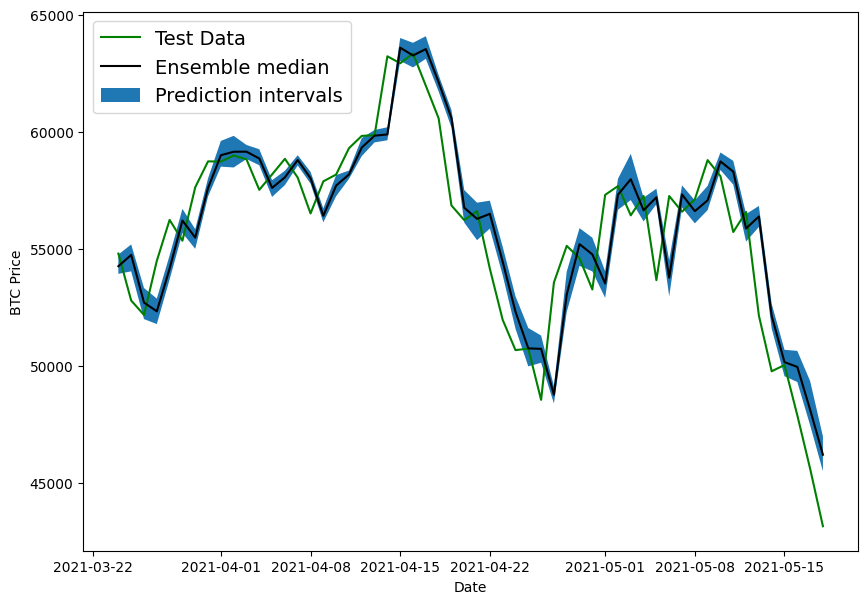

In [159]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

#Plot the median of our ensemble preds along with the prediction intervals (where the prediction intervals are also estimates)
plt.figure(figsize=(10,7))
offset=500
plt.plot(X_test.index[offset:], y_test[offset:],"g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds
plt.fill_between(X_test.index[offset:],(lower)[offset:], (upper)[offset:], label="Prediction intervals")
plt.legend(loc="upper left", fontsize=14)

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timesteps as the next timestep.

>**NOTE:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainity estimates in machine learning seek out to quantitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? or would it be helpful if a model could tell you that when it's making predcition, it deosn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know abou:
* **Aleatoric Uncertaininty** - this type of uncertainty cannot be reduced and it is often referred to as data uncertainity or subway uncertainty
* **Epistemc Uncertainty** - This type of uncertainty can be reduced, it is also reffered to as model or coconut uncertainty.

## Model 9: Train a model on the full historical data to make a prediction into the future

So far all of our models have predicted on the test dataset, however this is only a pseudo future.

Let's now build a model which is capable of predicting into the future.

In [160]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [161]:
HORIZON = 1
WINDOW_SIZE = 7

In [162]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [163]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

X_all.shape, y_all.shape

((2780, 7), (2780,))

In [164]:
# creating dataset with the tf.data API
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# combine the labels and features
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial perfomance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [165]:
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [166]:
tf.random.set_seed(42)

# Create a model 
model_9 = tf.keras.models.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_simple_Dense_model")

# compile
model_9.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

# fitting the model on complete data
model_9.fit(dataset_all,
           epochs=100,
           verbose=0,
           callbacks=[create_model_checkpoint(model_9.name)])

### Make predictions into future

In [167]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
    * a list of values (Bitcoin historical data)
    * a trained model (such as model_9)
    * a window into the future to predict (our INTO_FUTURE variable)
    * the window size a model was trained on WINDOW_SIZE - the model can only predict on the same kinf of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of prediction) and extracts the last WINDOW_SIZE values from the input values
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE sequence which updates to remove the first value and appends the latest prediction

In [168]:
# 1, Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """
    Make future forecasts into_future steps after values ends.
    
    Returns future forecasts as a list of floats
    """
    #2. Create an empty list for future forecasts/prepare data to forecast on
    future_forecasts = []
    last_window = values[-WINDOW_SIZE:]
    
    #3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each 
    for _ in range(INTO_FUTURE):
        # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on it's own forecast)
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Prediction on \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
        
        # append predictions to future_forecast
        future_forecasts.append(tf.squeeze(future_pred).numpy())
        
        #Update the last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
        
    return future_forecasts
        

In [169]:
# Make forecasts into the future
future_forecasts = make_future_forecasts(y_all,
                                        model_9,
                                        INTO_FUTURE,
                                        WINDOW_SIZE)

1/1 [==============================] - 0s 52ms/step
Prediction on 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55584.08984375

1/1 [==============================] - 0s 19ms/step
Prediction on 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55584.08984375] -> Prediction: 51586.34375

1/1 [==============================] - 0s 19ms/step
Prediction on 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55584.08984375 51586.34375   ] -> Prediction: 48906.47265625

1/1 [==============================] - 0s 19ms/step
Prediction on 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55584.08984375 51586.34375    48906.47265625] -> Prediction: 49695.703125

1/1 [==============================] - 0s 19ms/step
Prediction on 
 [47885.62525472 45604.61575361 43144.47129086 55584.08984375
 51586.34375    48906.47265625 49695.703125  ] -

In [170]:
len(future_forecasts)

14

In [171]:
##excercise prediction and training

## Plot Future Forecasts 

In [172]:
def get_future_dates(start_date, into_future, offset=1):
    """
    Return array of datetime values ranging from start_date to start_date+into_future
    """
    start_date = start_date + np.timedelta64(offset, "D") # specify start date ,"D" starts for day
    end_date = start_date + np.timedelta64(into_future, "D") #specify end date
    return np.arange(start_date, end_date, dtype="datetime64[D]") #return a date range between start date and end date
    
    

In [173]:
# Last timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [174]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                  into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [175]:
# Insert last timestep/ final price into next timesteps and future forecasts so the plot looks correct
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecasts = np.insert(future_forecasts, 0, btc_price[-1])
next_time_steps, future_forecasts

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55584.09 , 51586.344, 48906.473, 49695.703, 47015.68 ,
        44808.94 , 47489.438, 54614.96 , 50551.305, 48616.883, 49045.035,
        46179.777, 45747.805, 50148.38 ], dtype=float32))

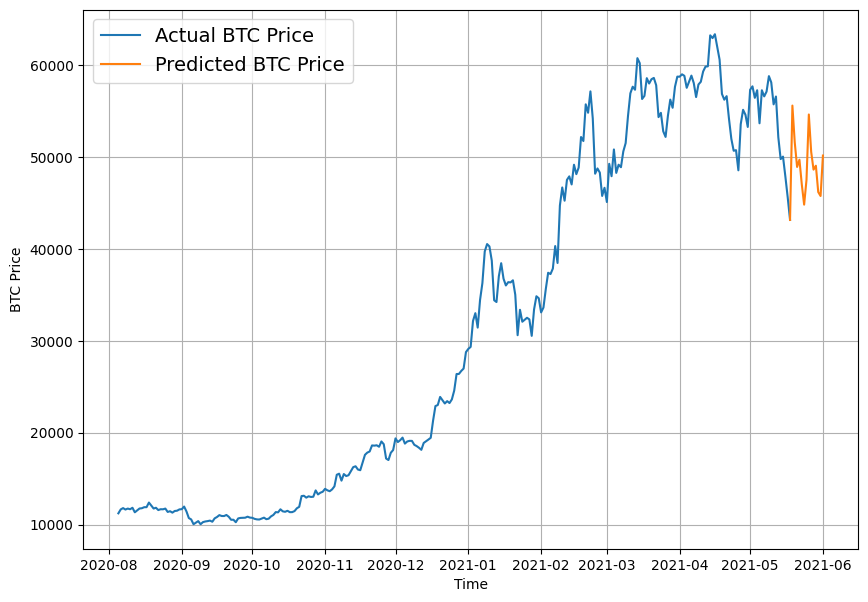

In [176]:
# Plot fututre prices predcitions of bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecasts, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is not effective (the Turkey Problem)



In [177]:
# Let's introduce a turkey problem to our data (price of BTC falls 100x in one day)

btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [178]:
# Manufacture an extra price on the end (to showcase our turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [179]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

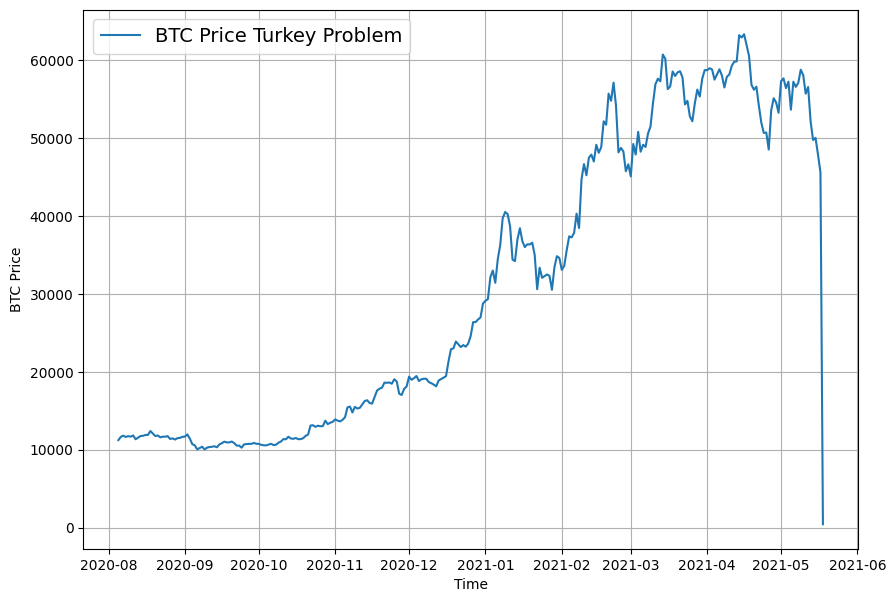

In [180]:
plt.figure(figsize=(10,7))
plot_time_series(btc_timesteps_turkey,
                btc_price_turkey, format="-", label="BTC Price Turkey Problem", start=2500)

In [181]:
# Create train and test sets for turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey), WINDOW_SIZE, HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)


[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361   431.44471291]]


In [182]:
model_1.summary()

Model: "model_1_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [183]:
# Clone model 1 architecture and fit the turkey model on turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                    optimizer="adam",
                    metrics=["mse","mae"])

turkey_model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test),
                callbacks=[create_model_checkpoint(turkey_model.name)])

Epoch 1/100
18/18 [==============================] - 1s 39ms/step - loss: 1421.5817 - mse: 7217095.0000 - mae: 1421.5817 - val_loss: 2713.4453 - val_mse: 21969924.0000 - val_mae: 2713.4453
Epoch 2/100
18/18 [==============================] - 1s 29ms/step - loss: 357.0956 - mse: 514112.2812 - mae: 357.0956 - val_loss: 1822.1490 - val_mse: 11177295.0000 - val_mae: 1822.1490
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 215.3940 - mse: 232695.5781 - mae: 215.3940 - val_loss: 1373.9254 - val_mse: 8596898.0000 - val_mae: 1373.9254
Epoch 4/100
18/18 [==============================] - 1s 30ms/step - loss: 185.4002 - mse: 181681.3281 - mae: 185.4002 - val_loss: 1110.0555 - val_mse: 7612012.5000 - val_mae: 1110.0555
Epoch 5/100
18/18 [==============================] - 1s 29ms/step - loss: 176.0452 - mse: 170152.9375 - mae: 176.0452 - val_loss: 1052.8531 - val_mse: 7371485.5000 - val_mae: 1052.8531
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - lo

In [184]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 724.0446 - mse: 4895565.5000 - mae: 724.0446


[724.0446166992188, 4895565.5, 724.0446166992188]

In [185]:
# Load the best performing turkey model
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 644.1561 - mse: 4843437.5000 - mae: 644.1561


[644.1561279296875, 4843437.5, 644.1561279296875]

In [186]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8862.982, 8776.546, 9046.924, 8787.419, 8717.582, 8752.439,
       8690.771, 8513.246, 8464.818, 8533.205], dtype=float32)>

In [187]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_test, turkey_preds)
turkey_results

{'mae': 17127.262,
 'mse': 614211400.0,
 'mape': 121.32856,
 'rmse': 23708.432,
 'mase': 26.504492}

In [188]:
model_1_results

{'mae': 573.95306,
 'mse': 1198482.6,
 'mape': 2.5795481,
 'rmse': 1094.7523,
 'mase': 1.0082766}

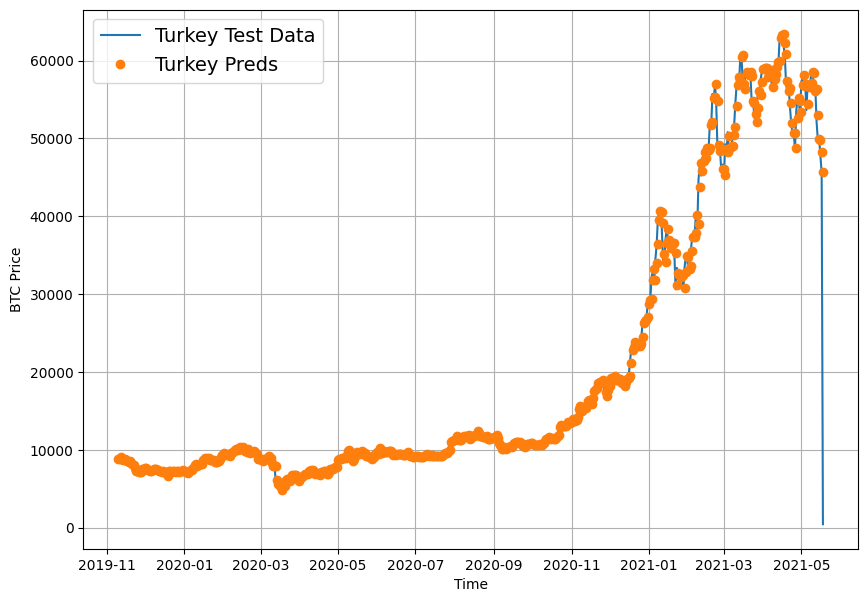

In [189]:
plt.figure(figsize=(10,7))
offset=0
plot_time_series(btc_timesteps_turkey[-len(X_test):],
                btc_price_turkey[-len(y_test):],
                label="Turkey Test Data",
                format="-",
                start=offset)
plot_time_series(btc_timesteps_turkey[-len(X_test):],
                turkey_preds,
                label="Turkey Preds",
                format="o",
                start=offset)

## Compare our models

In [190]:
# Compare differrent models results {w = window, h=horizon}
model_results = pd.DataFrame({"naive_model":naive_results,
                             "model_1_dense_w7_h1":model_1_results,
                             "model_2_dense_w30_h1":model_2_results,
                             "model_3_dense_w30_h7":model_3_results,
                             "model_4_conv1D":model_4_results,
                             "model_5_LSTM":model_5_results,
                             "model_6_multivariate":model_6_results,
                             "model_7_n_beats":model_7_results,
                             "model_8_ensemble":ensemble_results,
                             "model_10_turkey":turkey_results}).T

model_results

,mae,mse,mape,rmse,mase
naive_model,567.980218,1.147547e+06,2.516525,1071.236238,0.999570
model_1_dense_w7_h1,573.953064,1.198483e+06,2.579548,1094.752319,1.008277
model_2_dense_w30_h1,607.916565,1.283949e+06,2.777746,1133.114624,1.062644
model_3_dense_w30_h7,1239.936035,5.353795e+06,5.708652,1430.024780,2.206397
model_4_conv1D,570.536560,1.180823e+06,2.548473,1086.656738,1.002275
model_5_LSTM,589.602234,1.248232e+06,2.655449,1117.243286,1.035768
model_6_multivariate,567.474304,1.175317e+06,2.537215,1084.120361,0.996895
model_7_n_beats,575.419373,1.169803e+06,2.659363,1081.574219,1.010852
model_8_ensemble,567.226318,1.136350e+06,2.581691,1065.996948,0.996460
model_10_turkey,17127.261719,6.142114e+08,121.328560,23708.431641,26.504492


In [191]:
ensemble_results

{'mae': 567.2263,
 'mse': 1136349.5,
 'mape': 2.5816913,
 'rmse': 1065.997,
 'mase': 0.99645954}

<Axes: >

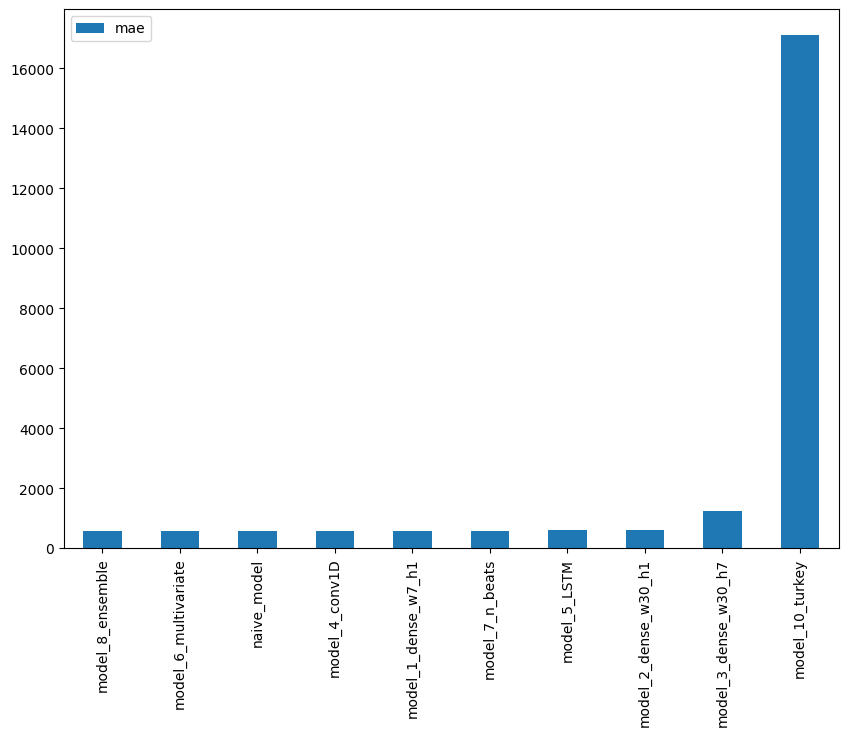

In [192]:
# Sort model results by mae and plot them 
model_results[["mae"]].sort_values("mae").plot(figsize=(10,7), kind="bar")